# Rice (Cammeo and Osmancik)

## Business Understanding

*  Tujuan: Membangun model klasifikasi untuk mengidentifikasi jenis biji beras (Cammeo dan Osmancik) berdasarkan fitur-fitur tertentu.

*  Manfaat: Memberikan alat identifikasi biji beras yang dapat membantu dalam pemisahan dan pengenalan jenis beras.



## Data Understanding

Datasetyang diguanakan adalah dataset Rice (Cammeo and Osmancik) dengan atribut seperti Area, Perimeter, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, Extent, dan Class (jenis beras).

### Penjelasan atribut


Berikut ini adalah penjelasan atribut atribut yang digunakan pada dataset:

1. Area (Luas): Mengembalikan jumlah piksel dalam batas biji beras. Ini mengukur luas daerah biji beras dalam piksel.

2. Perimeter (Keliling): Menghitung keliling dengan mengukur jarak antara piksel di sekitar batas biji beras. Ini memberikan panjang keliling biji beras dalam piksel.

3. Major Axis Length (Panjang Sumbu Utama): Garis terpanjang yang dapat digambar pada biji beras, yaitu jarak sumbu utama. Ini mengukur panjang garis terpanjang pada biji beras dalam piksel.

4. Minor Axis Length (Panjang Sumbu Kecil): Garis terpendek yang dapat digambar pada biji beras, yaitu jarak sumbu kecil. Ini mengukur panjang garis terpendek pada biji beras dalam piksel.

5. Eccentricity (Eksentrisitas): Mengukur seberapa bulat elips yang memiliki momen yang sama dengan biji beras. Ini memberikan informasi tentang seberapa bulat biji beras, di mana nilai mendekati 0 menandakan elips yang lebih bulat.

6. Convex Area (Luas Cembung): Mengembalikan jumlah piksel dari cangkang cembung terkecil dari wilayah yang dibentuk oleh biji beras. Ini mengukur luas area cembung dalam piksel.

7. Extent (Ketertelusuran): Mengembalikan rasio wilayah yang dibentuk oleh biji beras terhadap piksel kotak pembatas. Ini memberikan informasi tentang seberapa banyak area yang diisi oleh biji beras dalam kotak pembatasnya.

8. Class (Kelas): Jenis beras, misalnya, Cammeo dan Osmancik. Ini adalah label kategoris yang menunjukkan jenis atau kelas dari biji beras yang diamati.



### Library

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler



### Install dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [5]:
import pandas as pd

# Memuat file CSV
df = pd.read_csv('https://archive.ics.uci.edu/static/public/545/data.csv')

# Menampilkan tabel
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [7]:
X = df.drop(['Class'], axis=1)
y = df["Class"]


### Missing value

Cek apakah ada missing value pada dataset

In [8]:
print(X.isnull().sum())  # Menampilkan jumlah missing value untuk setiap kolom

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64


### Visualisasi

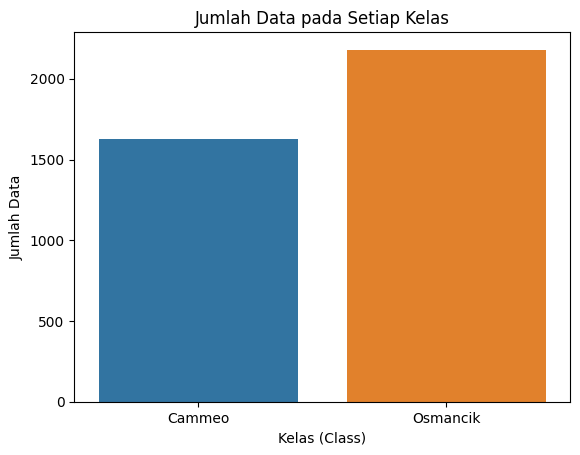

Jumlah Data pada Setiap Kelas:
Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64


In [12]:
sns.countplot(data=df, x='Class')
plt.title('Jumlah Data pada Setiap Kelas')
plt.xlabel('Kelas (Class)')
plt.ylabel('Jumlah Data')
plt.show()

# Menghitung jumlah data pada setiap kelas secara langsung
class_counts = df['Class'].value_counts()

# Menampilkan jumlah data pada setiap kelas
print('Jumlah Data pada Setiap Kelas:')
print(class_counts)


Pada distribusi class ini, terlihat bahwa class cameo memiliki data sebanyak 1630 lebih sedikit dari pada class osmancik yaitu sebanyak 2180

### Seleksi Fitur

Seleksi fitur adalah langkah penting dalam pemrosesan data untuk meningkatkan kinerja model dan mengurangi overfitting. ANOVA (Analysis of Variance) digunakan untuk mengukur perbedaan rata-rata antara dua atau lebih kelompok. Dalam konteks ini, kita akan menggunakan ANOVA untuk memilih fitur-fitur terbaik yang paling berpengaruh terhadap klasifikasi jenis biji beras.

Langkah-langkah:

1. Menentukan Banyaknya Fitur (N): Pertama, kita perlu menentukan jumlah total fitur dalam dataset.

2. Menentukan Jumlah Fitur Terbaik (K): Kita juga perlu menentukan jumlah fitur terbaik yang ingin kita pilih. Dalam contoh ini, K diatur menjadi 6.

3. Inisialisasi Selector: Menggunakan SelectKBest dari scikit-learn dengan fungsi skor ANOVA (f_classif) dan jumlah fitur terbaik (K) yang telah ditentukan.



In [13]:


# Menentukan banyaknya fitur (N)
total_features = len(X.columns)

# Menentukan jumlah fitur terbaik (K)
k_best_features = 6

# Inisialisasi Selector
selector = SelectKBest(score_func=f_classif, k=k_best_features)


In [14]:
# Lakukan seleksi fitur
selector.fit(X, y)


SelectKBest(k=6)

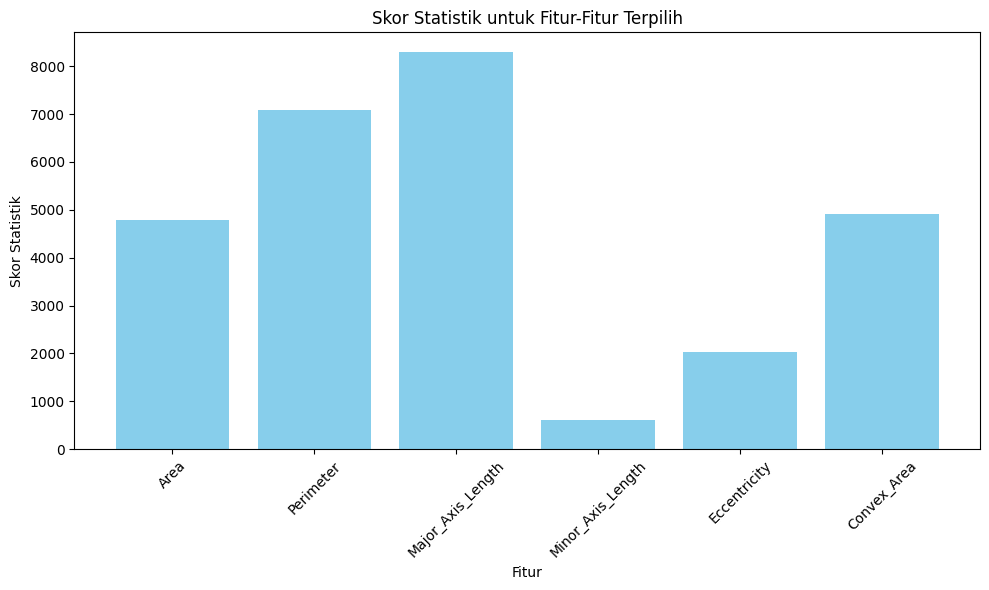

In [15]:
# Tampilkan hasil seleksi fitur
# Jumlah fitur terbaik yang terpilih disesuaikan dengan nilai K di atas
selected_features = selector.get_support(indices=True)
feature_names = X.columns

# Pilih nama-nama fitur yang dipilih
selected_feature_names = [feature_names[i] for i in selected_features]

# Hitung skor statistik untuk setiap fitur
scores = selector.scores_[selected_features]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, scores, color='skyblue')
plt.xlabel('Fitur')
plt.ylabel('Skor Statistik')
plt.title('Skor Statistik untuk Fitur-Fitur Terpilih')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [16]:
# Pilih hanya fitur-fitur terbaik
X_selected = X[selected_feature_names]


Rumus ANOVA:
$$
F = \frac{MSB}{MSW}
$$
MSB atau mean square antar kelompok (mean square between groups). dapat dari rumus ini :

$$
MSB = \frac{\sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X}_{\text{total}})^2}{k - 1}
$$
dan MSW atau mean square dalam kelompok (mean square within groups)

$$
MSW = \frac{\sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2}{N - k}
$$

In [18]:
# Menampilkan dataset yang sudah dipilih hanya dengan fitur-fitur terbaik
X_selected.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area
0,15231,525.578979,229.749878,85.093788,0.928882,15617
1,14656,494.311005,206.020065,91.730972,0.895405,15072
2,14634,501.122009,214.106781,87.768288,0.912118,14954
3,13176,458.342987,193.337387,87.448395,0.891861,13368
4,14688,507.166992,211.743378,89.312454,0.906691,15262


untuk membuang fitur yang skor statistik nya rendah


## Preprocesing Data


### Split data



In [19]:
from sklearn.model_selection import train_test_split

# Pembagian data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [20]:
X_train.shape


(3048, 6)

In [21]:
y_train

3644    Osmancik
3418    Osmancik
1351      Cammeo
3591    Osmancik
246       Cammeo
          ...   
1130      Cammeo
1294      Cammeo
860       Cammeo
3507    Osmancik
3174    Osmancik
Name: Class, Length: 3048, dtype: object

### Normalisasi Data
Normalisasi data dengan Min-Max Scaling adalah suatu teknik transformasi pada data numerik sehingga nilai-nilai tersebut dapat diubah ke dalam rentang yang lebih kecil, biasanya antara 0 dan 1. Rumus Min-Max Scaling untuk suatu nilai \(x\) dalam rentang asal \([a, b]\) menjadi nilai dalam rentang baru \([c, d]\) adalah sebagai berikut:
$$
\
\text{Scaled Value} = \frac{x - a}{b - a} \times (d - c) + c
\
$$
Dengan penjelasan sebagai berikut:

- \(x\) adalah nilai asli dari fitur.
- \(a\) adalah nilai minimum dalam rentang asal.
- \(b\) adalah nilai maksimum dalam rentang asal.
- \(c\) adalah nilai minimum dalam rentang baru.
- \(d\) adalah nilai maksimum dalam rentang baru.

Proses normalisasi ini akan membantu mencegah perbedaan skala antar fitur, yang dapat meningkatkan performa model machine learning, terutama untuk model-model yang sensitif terhadap skala seperti Support Vector Machines (SVM) atau k-Nearest Neighbors (kNN).

In [22]:
# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling

### Support Vector Machine (SVM)

Support Vector Machine (SVM) adalah model klasifikasi yang mencoba menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur. Fungsi keputusan SVM dapat dinyatakan sebagai:

$$
f(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)
$$

- $\mathbf{w}$ adalah vektor bobot,
- $\mathbf{x}$ adalah vektor fitur input,
- $b$ adalah bias, dan
- $\text{sign}$ adalah fungsi tanda.


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model SVM
svm_model.fit(X_train_scaled, y_train)

# Prediksi data uji
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluasi model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Tampilkan hasil evaluasi
print(f'Accuracy of SVM: {svm_accuracy}')


Accuracy of SVM: 0.931758530183727


### Random Forest

Random Forest adalah model ensemble yang terdiri dari sejumlah besar pohon keputusan. Prediksi dari Random Forest diperoleh dengan menggabungkan prediksi dari setiap pohon. Fungsi keputusan Random Forest dapat dinyatakan sebagai:

$$
f(x) = \text{mode}(f_1(x), f_2(x), ..., f_N(x))
$$

- $f_i(x)$ adalah fungsi keputusan pohon ke-$i$, dan
- $\text{mode}$ adalah modus dari prediksi semua pohon.


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model Random Forest
rf_model.fit(X_train_scaled, y_train)

# Prediksi data uji
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluasi model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Tampilkan hasil evaluasi
print(f'Accuracy of Random Forest: {rf_accuracy}')


Accuracy of Random Forest: 0.916010498687664


### Neural Network

Jaringan Saraf Tiruan (Neural Network) adalah model yang terdiri dari lapisan-lapisan neuron yang saling terhubung. Fungsi keputusan untuk jaringan saraf tiruan dapat dinyatakan sebagai:

$$
f(x) = \text{softmax}(\mathbf{W}_2 \cdot \text{ReLU}(\mathbf{W}_1 \cdot \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2)
$$

- $\mathbf{W}_1$ dan $\mathbf{W}_2$ adalah matriks bobot,
- $\mathbf{b}_1$ dan $\mathbf{b}_2$ adalah vektor bias,
- $\mathbf{x}$ adalah vektor fitur input,
- $\text{ReLU}$ adalah fungsi aktivasi ReLU, dan
- $\text{softmax}$ adalah fungsi aktivasi softmax.

In [29]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Latih model Neural Network
nn_model.fit(X_train_scaled, y_train)

# Prediksi data uji
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluasi model
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_classification_report = classification_report(y_test, nn_predictions)
nn_confusion_matrix = confusion_matrix(y_test, nn_predictions)

# Tampilkan hasil evaluasi
print(f'Accuracy of Neural Network: {nn_accuracy}')


Accuracy of Neural Network: 0.9278215223097113


## Evaluasi

Akurasi yang tertinggi yang saya dapat dari hasil yang sudah dibuat adalah SVM

In [31]:
print("Accuracy of SVM:",svm_accuracy)
print("Accuracy of Random Forest:", rf_accuracy)
print("Accuracy of Neural Network:", nn_accuracy)

Accuracy of SVM: 0.931758530183727
Accuracy of Random Forest: 0.916010498687664
Accuracy of Neural Network: 0.9278215223097113


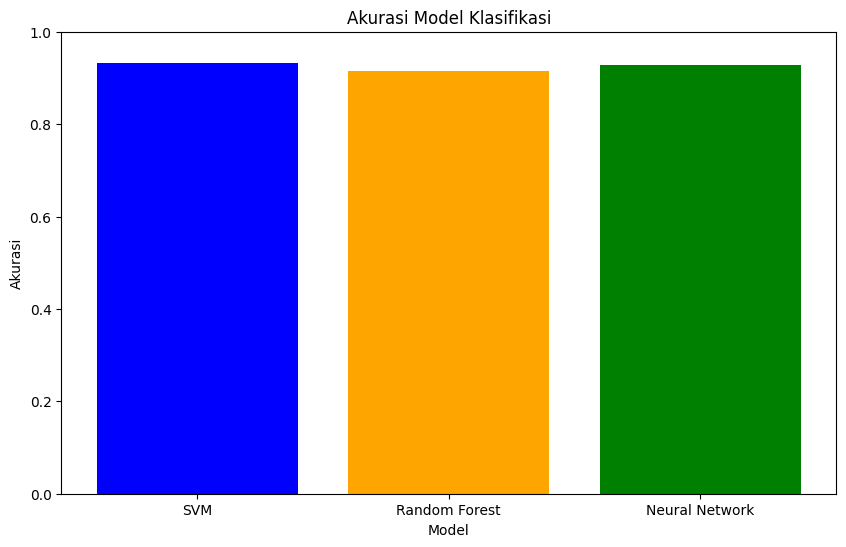

In [32]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['SVM', 'Random Forest', 'Neural Network']
accuracies = [svm_accuracy, rf_accuracy, nn_accuracy]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)  # Menetapkan batas y-axis antara 0 dan 1
plt.title('Akurasi Model Klasifikasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()


Save Model

In [33]:
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/Proyek Sain Data/Model/svm_model.pkl')

['/content/drive/MyDrive/Proyek Sain Data/Model/svm_model.pkl']